In [1]:
library('tidyverse')
library('rvest')
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [3]:
df.marathon |> head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 5M 54S,2.098333,Men's,Kenya
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | race.time |
| color | country.simple |
| facet value | MF |

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

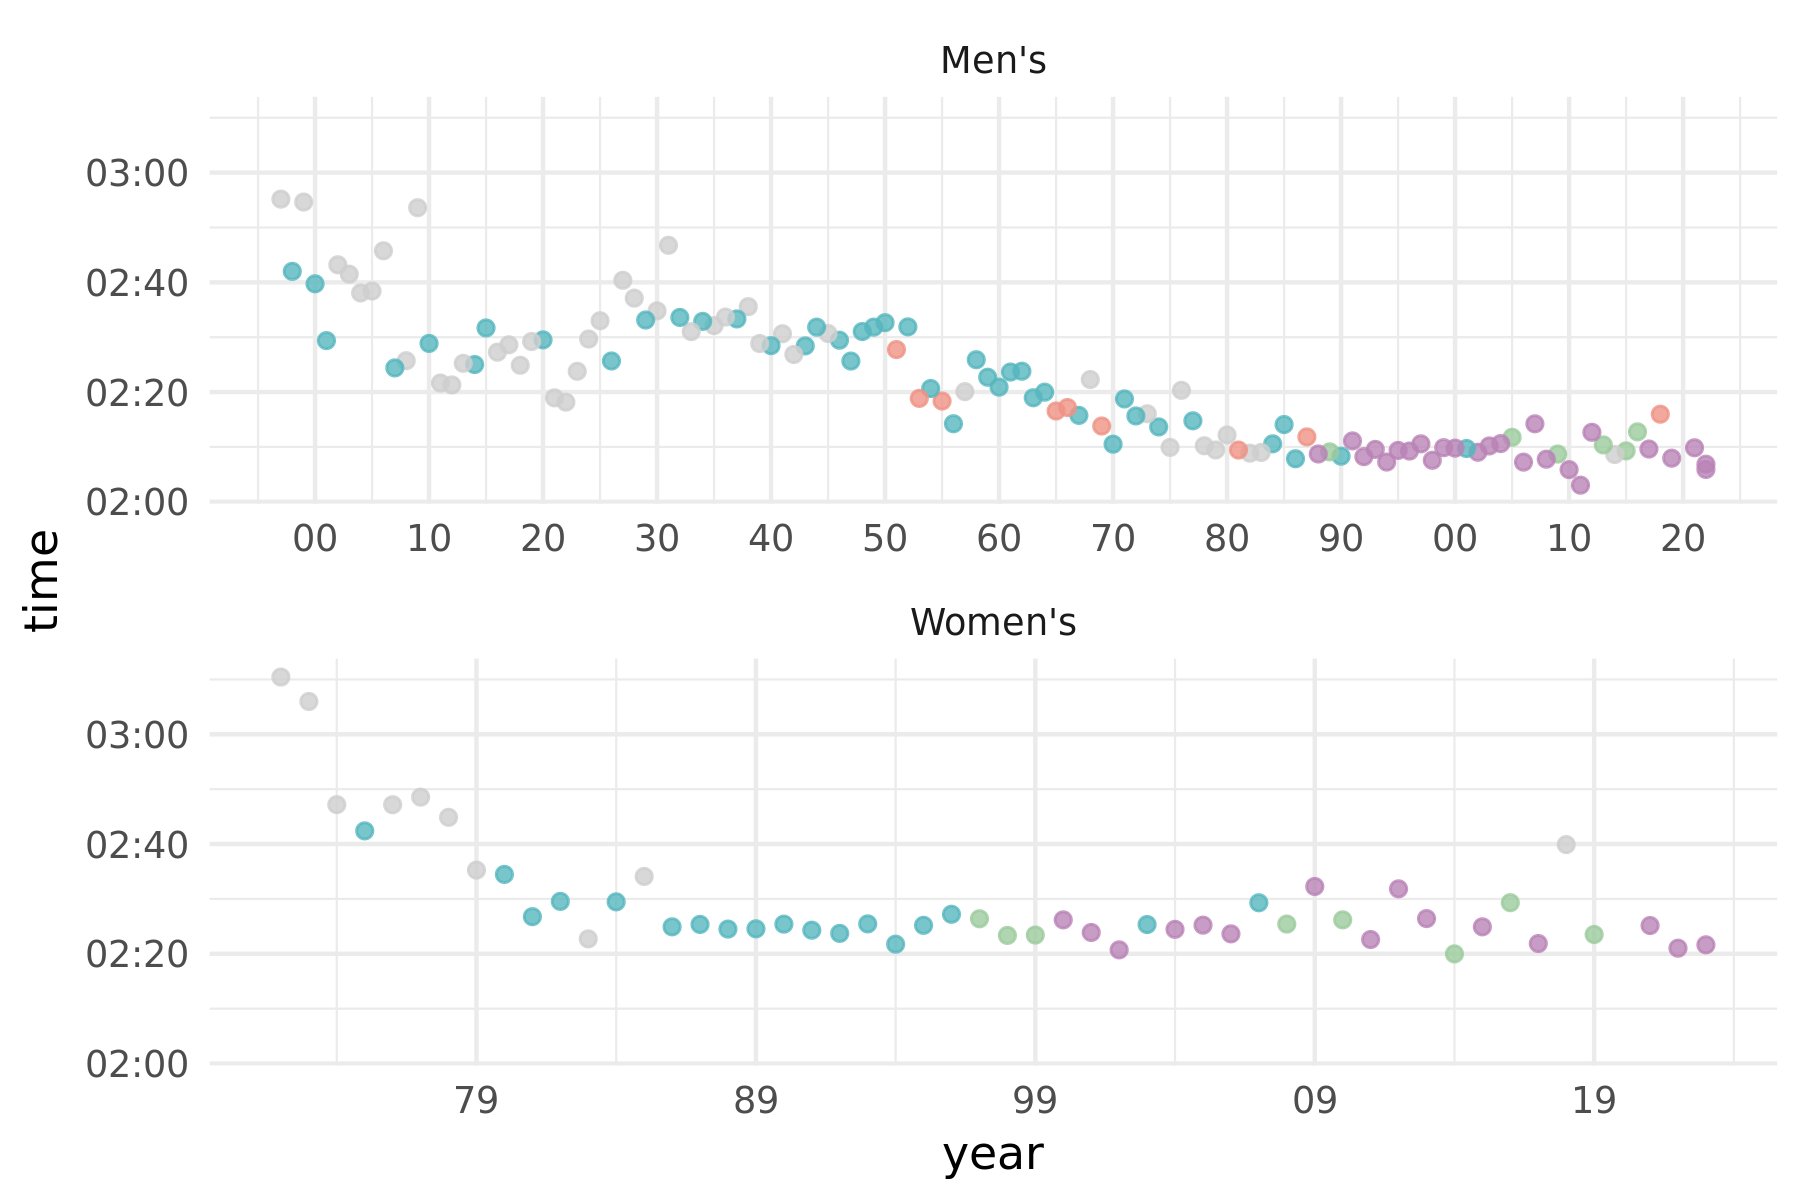

In [4]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 4)

colors = c('#9cca9e', '#ef9285', '#b983b7', '#cecece', '#56b6be')

df.marathon = df.marathon |>
    mutate(year = as.Date(paste(year, 1, 1, sep = '-')))

p = ggplot(df.marathon, aes(x = year, y = time, color = country.simple)) +
    geom_point(alpha = 0.8) +
    facet_wrap(~MF, ncol = 1, scale = 'free_x') +
    scale_y_time(labels = scales::label_time(format = '%H:%M')) +
    scale_x_date(date_breaks = '10 years', date_labels = '%y') +
    scale_color_manual(values = colors) +
    theme_minimal() +
    theme(legend.position = 'None')

p

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)

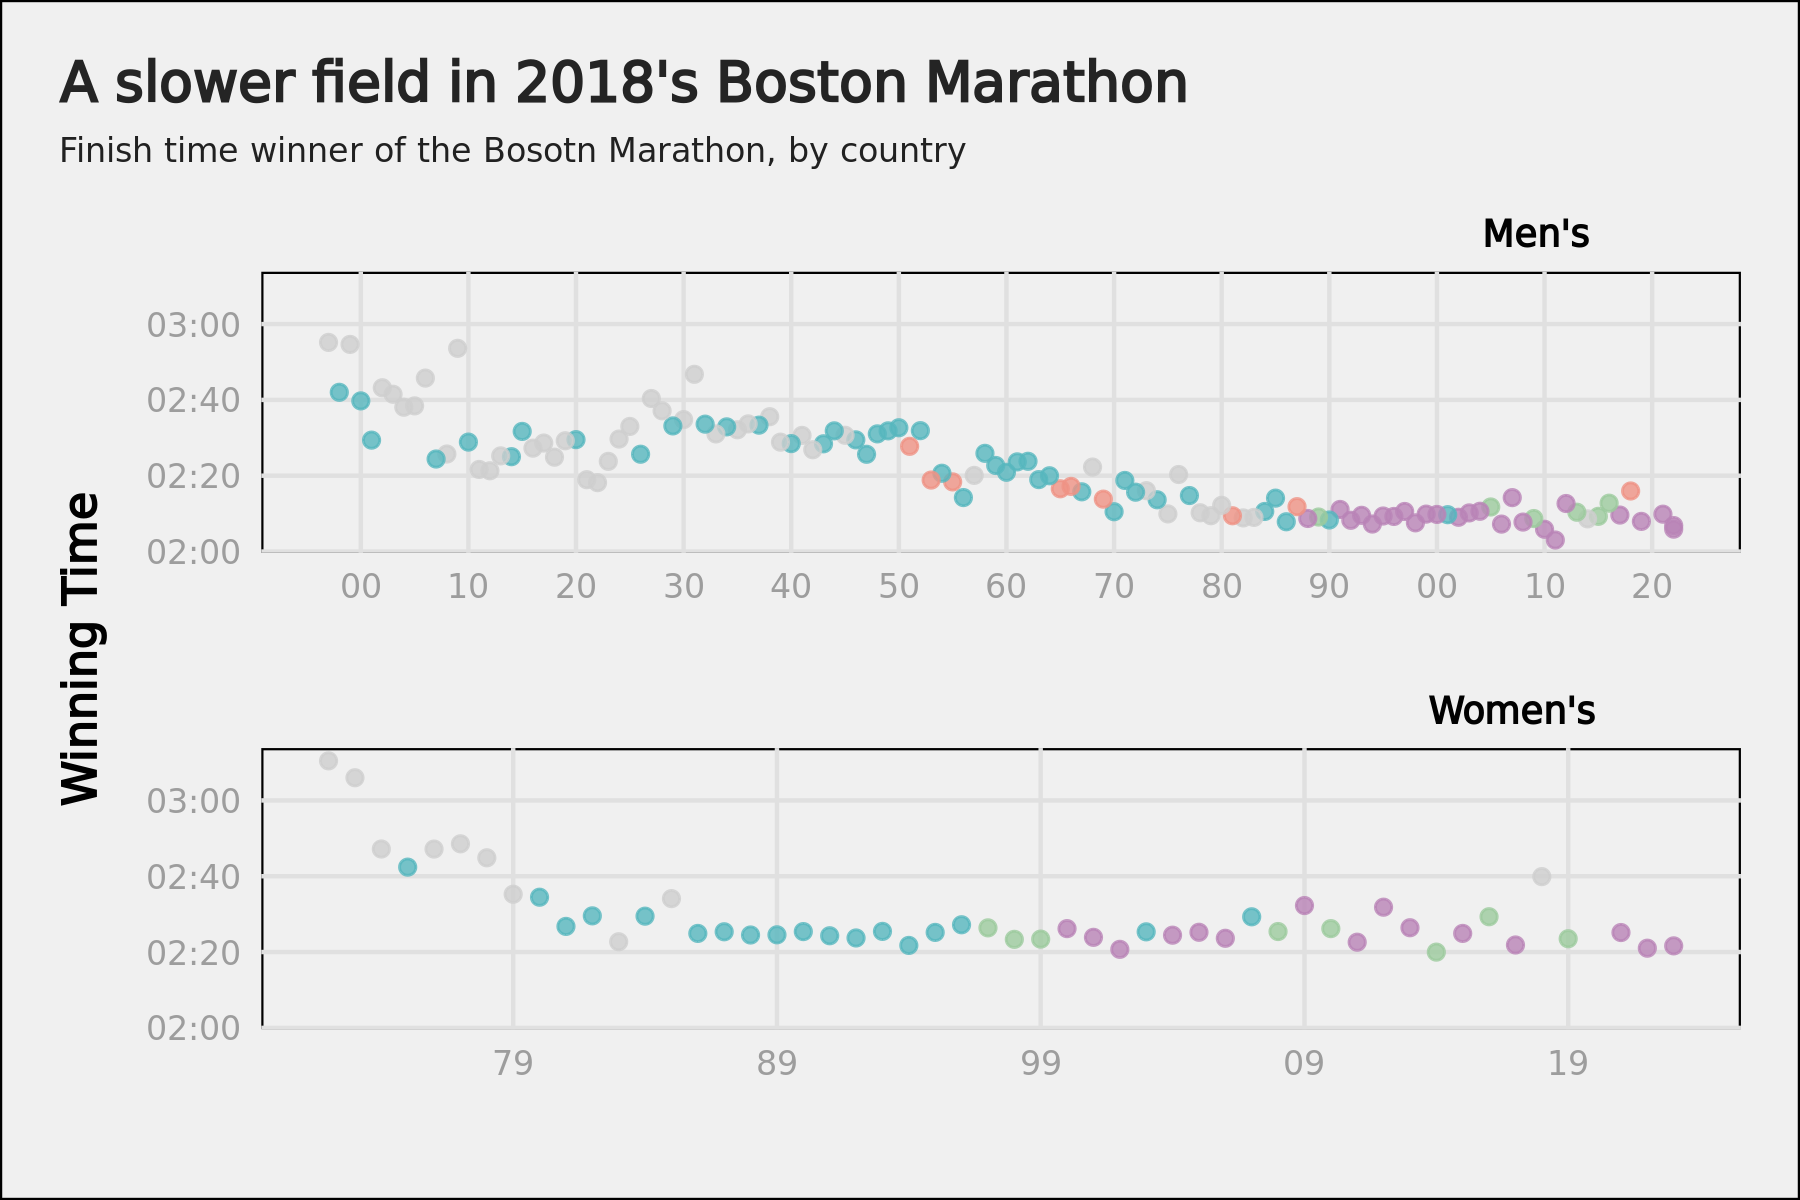

In [11]:
# Chuck's code

bg = c('#f0f0f0')

p2 = p + labs(x = '', y = 'Winning Time', title = "A slower field in 2018's Boston Marathon", 
            subtitle = 'Finish time winner of the Bosotn Marathon, by country') +
    theme(legend.position = 'None',
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          plot.subtitle = element_text(color = '#212121', size = 8),
          plot.title = element_text(color = '#242424', face = 'bold'),
          strip.text = element_text(hjust = 0.9, color = '#010101', face = 'bold'),
          plot.title.position = 'plot',
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          strip.background = element_blank(),
          strip.placement = 'inside',
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank(),
          panel.spacing = unit(0.5, "cm"),
          axis.ticks = element_blank(),
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8))

p2